In [1]:
import json
import numpy as np 
from scipy.optimize import curve_fit 
from matplotlib import pyplot as plt 
import requests

In [2]:
####### INPUTS
start_day = 0 # inizio finestra fitting (giorni a partire dal 24 febbraio)
end_day = 11  # fine finestra fitting (giorni a partire dal 24 febbraio)

In [3]:
####### IMPORTAZIONE DATI

r = requests.get('https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-json/dpc-covid19-ita-andamento-nazionale.json')
national_data = r.content
national_data_dict = json.loads(national_data)

####### INIZIALIZZAZIONE LISTE

i = 0
days = np.linspace(0,len(national_data_dict)-1,len(national_data_dict))
ricoverati_con_sintomi = []
terapia_intensiva = []
totale_ospedalizzati = []
isolamento_domiciliare = []
totale_attualmente_positivi = []
nuovi_attualmente_positivi = []
dimessi_guariti = []
deceduti = []
totale_casi = []

####### POPOLAZIONE LISTE

for elem in national_data_dict:
    ricoverati_con_sintomi.append(elem["ricoverati_con_sintomi"])
    terapia_intensiva.append(elem["terapia_intensiva"])
    totale_ospedalizzati.append(elem["totale_ospedalizzati"])
    isolamento_domiciliare.append(elem["isolamento_domiciliare"])
    totale_attualmente_positivi.append(elem["totale_attualmente_positivi"])
    nuovi_attualmente_positivi.append(elem["nuovi_attualmente_positivi"])
    dimessi_guariti.append(elem["dimessi_guariti"])
    deceduti.append(elem["deceduti"])
    totale_casi.append(elem["totale_casi"])

In [4]:
####### DEFINIZIONE FUNZIONI TEST

def exponential(x, a, b): 
    return a * np.exp(b * x) 

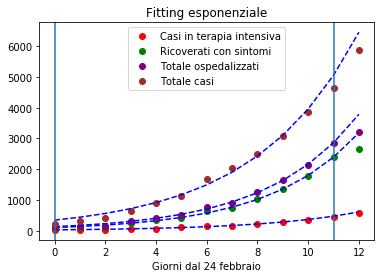

In [5]:
####### CURVE FITTING

# Esponenziale
param_ricoverati_con_sintomi_exp, param_cov_ricoverati_con_sintomi_exp = curve_fit(exponential,days[start_day:end_day],ricoverati_con_sintomi[start_day:end_day])
param_terapia_intensiva_exp, param_cov_terapia_intensiva_exp = curve_fit(exponential,days[start_day:end_day],terapia_intensiva[start_day:end_day])
param_totale_ospedalizzati_exp, param_cov_totale_ospedalizzati_exp = curve_fit(exponential,days[start_day:end_day],totale_ospedalizzati[start_day:end_day])
param_totale_casi_exp, param_cov_totale_casi_exp = curve_fit(exponential,days[start_day:end_day],totale_casi[start_day:end_day])

####### PLOTS

predicted_data_terapia_intensiva_exp = (param_terapia_intensiva_exp[0]*(np.exp(param_terapia_intensiva_exp[1]*days)))
predicted_ricoverati_con_sintomi_exp = (param_ricoverati_con_sintomi_exp[0]*(np.exp(param_ricoverati_con_sintomi_exp[1]*days)))
predicted_totale_ospedalizzati_exp = (param_totale_ospedalizzati_exp[0]*(np.exp(param_totale_ospedalizzati_exp[1]*days)))
predicted_totale_casi_exp = (param_totale_casi_exp[0]*(np.exp(param_totale_casi_exp[1]*days)))

plt.plot(days, terapia_intensiva, 'o', color ='red', label ="Casi in terapia intensiva") 
plt.plot(days, predicted_data_terapia_intensiva_exp, '--', color ='blue') 

plt.plot(days, ricoverati_con_sintomi, 'o', color ='green', label ="Ricoverati con sintomi") 
plt.plot(days, predicted_ricoverati_con_sintomi_exp, '--', color ='blue',) 

plt.plot(days, totale_ospedalizzati, 'o', color ='purple', label ="Totale ospedalizzati") 
plt.plot(days, predicted_totale_ospedalizzati_exp, '--', color ='blue',) 

plt.plot(days, totale_casi, 'o', color ='brown', label ="Totale casi") 
plt.plot(days, predicted_totale_casi_exp, '--', color ='blue',) 

plt.axvline(x=start_day)
plt.axvline(x=end_day)

plt.legend() 
plt.title("Fitting esponenziale", fontdict=None, loc='center', pad=None)
plt.xlabel("Giorni dal 24 febbraio", fontdict=None, labelpad=None)
plt.show() 